In [1]:
# if hit plotting library issues, try resetting LD path for julia
# can set in ~/.local/share/jupyter/kernels/
haskey(ENV, "LD_LIBRARY_PATH") && @assert ENV["LD_LIBRARY_PATH"] == ""
import Pkg
pkgs = [
    "Revise",
    "FASTX",
    "BioSequences",
    "Kmers",
    "Graphs",
    "MetaGraphs",
    "SparseArrays",
    "ProgressMeter",
    "Distributions",
    "HiddenMarkovModels",
    "BioAlignments",
    "StatsBase",
    "Random",
    "StatsPlots",
    "Statistics",
    # "GraphMakie",
    "IterTools",
    "Primes",
    "OnlineStats",
    "IteratorSampling",
    "HypothesisTests",
    "Clustering",
    "Distances",
    "BioAlignments",
    "Statistics",
    "Primes",
    "DataFrames",
    "BioSymbols",
    "LinearAlgebra"
]
# Pkg.add(pkgs)
for pkg in pkgs
    eval(Meta.parse("import $pkg"))
end
# Pkg.develop(path="/global/cfs/projectdirs/m4269/cjprybol/Mycelia")
# Pkg.develop(path="../../..")
import Mycelia

┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ /global/cfs/cdirs/m4269/cjprybol/Mycelia/Manifest.toml:0
[ Info: Precompiling Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd]
[ Info: Skipping precompilation since __precompile__(false). Importing Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd].


In [2]:
PROJECT_BASEDIR = dirname(pwd())
data_dir = joinpath(PROJECT_BASEDIR, "data")
genome_dir = mkpath(joinpath(data_dir, "genomes"))

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes"

In [3]:
working_dir = joinpath(data_dir, "test")
mkpath(working_dir)

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/test"

In [4]:
short_read_sets = unique(map(x -> match(r"^(.+\.\d+x)\.", x).captures[1], filter(x -> occursin(r"\.fna\.art", x) && occursin(r"\.fq\.gz", x) && !occursin("trimming_report", x) && !occursin("_val_", x), sort(readdir(genome_dir, join=true), by=x->filesize(x)))))


18-element Vector{SubString{String}}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 68 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 69 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 71 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 70 bytes ⋯ "na.normalized.vcf.fna.art.1000x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 77 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 72 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 73 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 78 bytes ⋯ "na.normalized.vcf.fna.art.1000x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 73 bytes ⋯ "na.normaliz

In [5]:
# short_read_set = short_read_sets[1]
# short_read_set = short_read_sets[2]
# short_read_set = short_read_sets[3]
short_read_set = short_read_sets[4]

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.art.10x"

In [6]:
forward = short_read_set * ".1_val_1.fq.gz"
reverse = short_read_set * ".2_val_2.fq.gz"

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.art.10x.2_val_2.fq.gz"

In [7]:
short_read_set_joint_fastq = short_read_set * ".joint.fq.gz"
if !isfile(short_read_set_joint_fastq)
    run(pipeline(`cat $(forward) $(reverse)`, short_read_set_joint_fastq))
end
short_read_set_joint_fastq
original_fastq = short_read_set_joint_fastq

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.art.10x.joint.fq.gz"

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 3, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 298], [0, 1, 9, 30, 32], false)
  4.662325 seconds (1.46 M allocations: 92.626 MiB, 99.99% compilation time)
(k, predicted_saturation) = (3, 1.0)


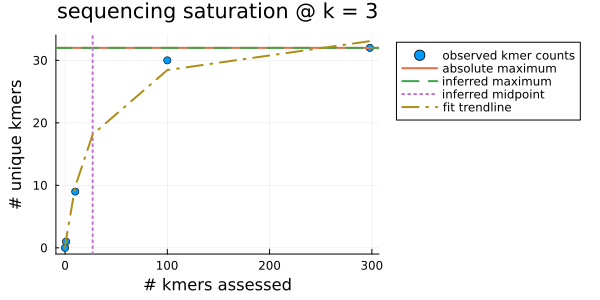

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 5, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 14814], [0, 1, 10, 91, 408, 511, 512], false)
  0.000103 seconds (265 allocations: 24.938 KiB)
(k, predicted_saturation) = (5, 1.0)


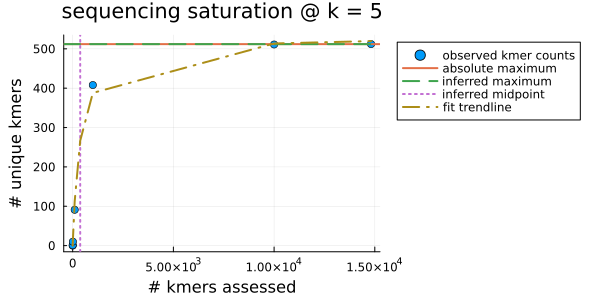

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 7, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 97635], [0, 1, 10, 99, 919, 4228, 5626], true)
  0.000090 seconds (245 allocations: 23.031 KiB)
(k, predicted_saturation) = (7, 0.686767578125)


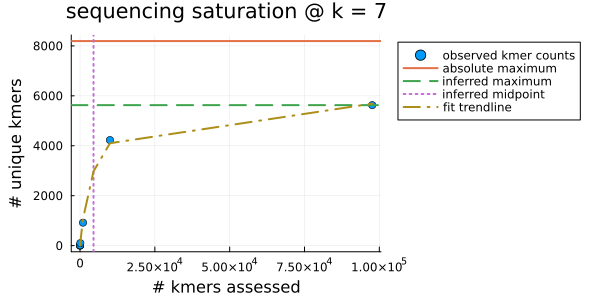

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 11, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 94915], [0, 1, 10, 100, 1000, 6632, 12227], true)
  0.000068 seconds (205 allocations: 19.219 KiB)
(k, predicted_saturation) = (11, 0.005830287933349609)


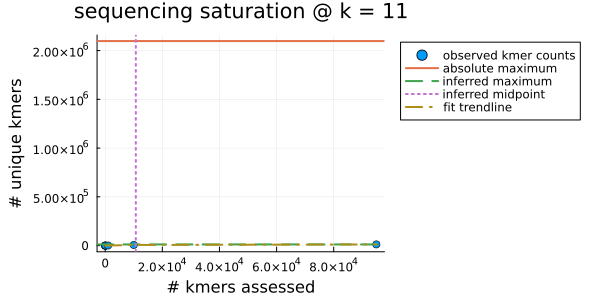

[ Info: polishing with k = 11
Progress: 100%|█████████████████████████████████████████| Time: 0:11:53
[ Info: polishing with k = 13
Progress: 100%|█████████████████████████████████████████| Time: 0:00:43
[ Info: polishing with k = 17
Progress: 100%|█████████████████████████████████████████| Time: 0:00:10
[ Info: polishing with k = 19
Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
[ Info: polishing with k = 23
Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
[ Info: polishing with k = 31
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
[ Info: polishing with k = 53
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
[ Info: polishing with k = 89
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


8-element Vector{@NamedTuple{fastq::String, k::Int64}}:
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.art.10x.joint.k11.fq.gz", k = 11)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.art.10x.joint.k11.k13.fq.gz", k = 13)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.fq.gz", k = 17)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.fq.gz", k = 19)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.k23.fq.gz", k = 23)
 (fastq = "/global/cfs/c

In [8]:
# almost no time at all for short reads
polishing_results = Mycelia.iterative_polishing(original_fastq)

In [9]:
assembly_fastq = last(polishing_results).fastq
# assembly_fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.joint.k11.k13.k17.k19.k23.k31.k53.k89.fq.gz"

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.k23.k31.k53.k89.fq.gz"

In [10]:
# assembly_k = last(polishing_results).k
assembly_k = 89

89

In [11]:
mean_read_length = Statistics.mean([length(FASTX.sequence(record)) for record in Mycelia.open_fastx(assembly_fastq)])

143.37058823529412

In [12]:
kmer_graph = Mycelia.build_directed_kmer_graph(fastq=assembly_fastq, k=assembly_k)

{17353, 17245} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [13]:
# heuristic - should be based on something better or removed altogether
max_filter = 5

initial_connected_components = length(Graphs.connected_components(kmer_graph))
coverage_threshold = 1
tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
while (length(Graphs.connected_components(candidate_subgraph)) == initial_connected_components) && (coverage_threshold < max_filter)
    coverage_threshold += 1
    tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
    candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
end
coverage_threshold -= 1
@show coverage_threshold

tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
filtered_graph, filtered_graph_vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
# candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, [v for v in Graphs.vertices(kmer_graph) if kmer_graph.vprops[v][:count] >= coverage_threshold])

coverage_threshold = 0


({17353, 17245} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  17344, 17345, 17346, 17347, 17348, 17349, 17350, 17351, 17352, 17353])

In [14]:
connected_components = sort(Graphs.connected_components(filtered_graph), by=x->length(x), rev=true)

108-element Vector{Vector{Int64}}:
 [3, 13, 14, 35, 45, 48, 53, 57, 62, 70  …  17201, 17218, 17224, 17241, 17246, 17272, 17310, 17312, 17316, 17326]
 [7, 24, 66, 79, 102, 140, 187, 194, 230, 233  …  17153, 17167, 17191, 17192, 17269, 17289, 17302, 17335, 17337, 17349]
 [10, 30, 76, 100, 101, 210, 216, 240, 244, 314  …  17145, 17146, 17184, 17257, 17267, 17282, 17292, 17319, 17332, 17347]
 [4, 5, 17, 20, 49, 56, 60, 75, 104, 154  …  17040, 17042, 17049, 17062, 17099, 17119, 17152, 17170, 17182, 17207]
 [152, 177, 221, 385, 398, 399, 507, 512, 581, 588  …  17125, 17140, 17147, 17193, 17258, 17277, 17281, 17286, 17293, 17331]
 [31, 33, 34, 94, 96, 111, 114, 115, 176, 200  …  16905, 16944, 16950, 16955, 16967, 17087, 17225, 17243, 17273, 17327]
 [42, 119, 135, 229, 231, 273, 393, 409, 432, 451  …  17075, 17080, 17149, 17187, 17204, 17228, 17231, 17239, 17240, 17294]
 [72, 130, 145, 207, 217, 275, 337, 414, 435, 467  …  16982, 16990, 17057, 17061, 17108, 17114, 17154, 17179, 17295, 17301]
 

In [15]:
length.(connected_components)

108-element Vector{Int64}:
 1074
  641
  601
  599
  508
  501
  470
  404
  399
  394
  349
  335
  334
    ⋮
   57
   42
   42
   37
   37
   36
   25
   23
   17
   14
   14
    9

In [16]:
connected_component_sequences = BioSequences.LongDNA{2}[]
for connected_component in connected_components
    connected_component_subgraph, connected_component_subgraph_vertex_map = Graphs.induced_subgraph(filtered_graph, connected_component)
    sorted_connected_component_subgraph = Graphs.topological_sort_by_dfs(connected_component_subgraph)
    dsp_result = Graphs.dijkstra_shortest_paths(connected_component_subgraph, first(sorted_connected_component_subgraph))
    maxdist, maxdist_index = findmax(map(d -> d == Inf ? zero(d) : d, dsp_result.dists))
    connected_component_subgraph_longest_path = Graphs.enumerate_paths(dsp_result, maxdist_index)
    # @show connected_component_subgraph_longest_path
    original_graph_kmer_indices = filtered_graph_vertex_map[connected_component_subgraph_vertex_map[connected_component_subgraph_longest_path]]
    connected_component_subgraph_longest_path_reconstructed_sequence = Mycelia.kmer_path_to_sequence(kmer_graph.gprops[:ordered_kmers][original_graph_kmer_indices])
    push!(connected_component_sequences, connected_component_subgraph_longest_path_reconstructed_sequence)
end
connected_component_sequences
length.(connected_component_sequences)

108-element Vector{Int64}:
 1159
  729
  689
  687
  459
  514
  541
  492
  455
  482
  437
  380
  422
    ⋮
  145
  130
  130
  125
  125
  124
  113
  111
  105
  102
  102
   97

In [ ]:
# first_sequence_canonical_kmers = unique(last.(collect(Kmers.EveryCanonicalKmer{Kmers.DNAKmer{assembly_k}}(connected_component_sequences[1]))))
# second_sequence_canonical_kmers = unique(last.(collect(Kmers.EveryCanonicalKmer{Kmers.DNAKmer{assembly_k}}(connected_component_sequences[2]))))
# intersect(first_sequence_canonical_kmers, second_sequence_canonical_kmers)

In [17]:
assembled_contig_quality_table = DataFrames.DataFrame()
for (i, connected_component_sequence) in enumerate(connected_component_sequences)
    this_table = Mycelia.assess_assembly_quality(assembled_sequence=connected_component_sequence, fastq=original_fastq)
    this_table[!, "contig"] .= "$(i)"
    this_table[!, "contig_length"] .= length(connected_component_sequence)
    append!(assembled_contig_quality_table, this_table)
end
assembled_contig_quality_table

Progress: 100%|█████████████████████████████████████████| Time: 0:00:05
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 

Row,k,cosine_distance,js_divergence,qv,contig,contig_length
,Int64,Float64,Float64,Float64,String,Int64
1,11,0.0,0.0,Inf,1,1159
2,13,1.11022e-16,0.0,Inf,1,1159
3,17,0.0,0.0,Inf,1,1159
4,19,0.0,0.0,Inf,1,1159
5,23,0.0,0.0,Inf,1,1159
6,31,0.0,0.0,Inf,1,1159
7,53,0.0,0.0,Inf,1,1159
8,11,0.0,0.0,Inf,2,729
9,13,1.11022e-16,0.0,Inf,2,729


In [18]:
function find_canonical_kmer_overlaps(sequences, k)
    sequence_canonical_kmers = keys.(Mycelia.count_canonical_kmers.(Kmers.DNAKmer{k}, sequences))
    canonical_kmer_intersect_sizes = zeros(length(sequence_canonical_kmers), length(sequence_canonical_kmers))
    for (a, aset) in enumerate(sequence_canonical_kmers)
        for (b, bset) in enumerate(sequence_canonical_kmers)
            canonical_kmer_intersect_sizes[a, b] = length(intersect(aset, bset))
        end
    end
    canonical_kmer_intersect_sizes
end

function find_best_kmer_intersect(canonical_kmer_intersect_sizes)
    off_diagonal_mask = .!Matrix(LinearAlgebra.I, size(canonical_kmer_intersect_sizes))
    max_off_diagonal_score = maximum(canonical_kmer_intersect_sizes[off_diagonal_mask])
    @assert max_off_diagonal_score > 0
    return findfirst(canonical_kmer_intersect_sizes .== max_off_diagonal_score)
end

function dna_pair_align(seq1, seq2, scoremodel = BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-1))
    BioAlignments.pairalign(BioAlignments.OverlapAlignment(), seq1, seq2, scoremodel)
end

function find_best_alignment(seq1, seq2, scoremodel = BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-1))
    forward_alignment = dna_pair_align(seq1, seq2, scoremodel)
    reverse_complement_alignment = dna_pair_align(seq1, BioSequences.reverse_complement(seq2), scoremodel)
    if BioAlignments.score(forward_alignment) > BioAlignments.score(reverse_complement_alignment)
        best_alignment = forward_alignment
    else
        best_alignment = reverse_complement_alignment
    end
    return best_alignment
end

function pairwise_align_sequences(sequences)
    best_pairwise_alignments = Array{Any}(undef, length(sequences), length(sequences))
    ProgressMeter.@showprogress for (a, a_seq) in enumerate(sequences)
        for (b, b_seq) in enumerate(sequences)
            best_pairwise_alignments[a, b] = find_best_alignment(a_seq, b_seq)
        end
    end
    best_pairwise_alignments
end

function find_best_alignment(best_pairwise_alignments)
    alignment_scores = BioAlignments.score.(best_pairwise_alignments)
    off_diagonal_mask = .!Matrix(LinearAlgebra.I, size(best_pairwise_alignments))
    max_off_diagonal_score = maximum(alignment_scores[off_diagonal_mask])
    return findfirst(alignment_scores .== max_off_diagonal_score)
end

"""
pass in alignment_result.aln or BioAlignments.alignment(alignment_result)
"""
function consensus_sequence(alignment)
    consensus_symbols = BioSymbols.DNA[]
    for alignment_tuple in collect(alignment)
        push!(consensus_symbols, rand(filter(x -> x != BioSymbols.DNA_Gap, alignment_tuple)))
    end
    consensus_seq = BioSequences.LongDNA{2}(consensus_symbols)
    return consensus_seq
end

consensus_sequence

In [19]:
assembly_sequences = deepcopy(connected_component_sequences)

108-element Vector{BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
 CGACAGGAATTCATAAACAAGGTCAACAGTCACGCGGCG…AAGAGAGATCTCCGACTCATGGCAAACGCAATCTGCTCT
 TCACTCTTTGTTCTTTCTAACCAACCCAGCTCATTGGCC…TCATCAGCTCCACGAAGCTTTTCCTCTGTTCTCCTCTCA
 CCTGGGAAGTCAAGGGCCAAGGCCCCGATTTCCCCATCA…TGAAACCACATAGCTCACCACCAGCAGTCCTATGGCTGC
 CCAAACATAGCCCTTCCTCTTCTCGCTATGCTGTCACCC…CCATCCCCAACGCTCGTGAAAAAAGGGGAAACAACGGCT
 GTTAATCATTCCTCCATGTTGGGAAGCGTGAACCGACAG…TGAAGTCTCTGTCGTCAATTCCAATGCATCTGATGCTGT
 GATTGAGCGGTTGAGAAAGGAATATGGATCCACTTGGCT…CATAGCCCAGACTTGAGAGGGGAGTGCTTGACCTGTGTC
 CGGATGGCGGTCCTCGGCGACACCGCTTGGGACTTTGGC…GATATTAGCCACTTGGTTGACAGTCGTCGTTGGGGTGAA
 ATCGCAACTCACCGGTACAGCAGAGCAGATTGCGTATGC…GCTCCTCCATGTCTCTTTCATTGATGACAGCCTCTGCTT
 GAAAAGAAGCGGCGCCATGTGGGACATTCCATCCCCAAC…CCCCGATAATTGACAAAAATGGACATGTAATTGGCCTGT
 CCGAATGTGACACAGCTATCATAGGAACGGCGGTTCGCG…AGTTTCAAGACAAAAGATGGATGTTGGTATGCTTTGACT
 CCCAGCCAGCCGTGTCATCGGCATACACCTTGCCTCCTG…TGACTGTTGACCTTGTTTATGAATTCCTGTCGCGTGCAC
 TTATCATGCGATCTGACATCTCAGAAATGGGA

In [20]:
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 2328
  seq:    1 ATCGCAACTCACCGGTACAGCAGAGCAGATTGCGTATGCCATGAGACGGAGATCTCTCCT   60
                                 |||||||||||||| ||||||||| |||||||||||| |
  ref:    0 ---------------------AGAGCAGATTGCGTTTGCCATGAGTCGGAGATCTCTCTT   39

  seq:   61 GTGAAAGTACAACAGTAGCCACATCTGGGCATAAGACTTGCCCAAGCATGCTGTTTCACT  120
            ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:   40 GTGAAAGTACAACAGTAGCCACATCTGGGCATAAGACTTGCCCAAGCATGCTGTTTCACT   99

  seq:  121 GAGTGACCAGCCTTTTCCTGGAGAAACTCTAAACGCCCTGCCTATCAACTCATCTTGGTG  180
            ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  100 GAGTGACCAGCCTTTTCCTGGAGAAACTCTAAACGCCCTGCCTATCAACTCATCTTGGTG  159

  seq:  181 CCGGCAGGGAACTATTATTGTTCTTCCACATCGGGAGCTTGTTGAAGTGGTGGGAGCAAA  240
            ||||||||||||||||||||||||||||||||||||||||||||||||

In [21]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 2150
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 ATCGCAACTCACCGGTACAGCAGAGCAGATTGCGTTTGCCATGAGACGGAGATCTCTCCT   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 GTGAAAGTACAACAGTAGCCACATCTGGGCATAAGACTTGCCCAAGCATGCTGTTTCACT  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 GAGTGACCAGCCTTTTCCTGGAGAAACTCTAAACGCCCTGCCTATCAACTCATCTTGGTG  180

  seq:    0 ------------------------------------------------------------    0
                                                            

In [22]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 2110
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 ATCGCAACTCACCGGTACAGCAGAGCAGATTGCGTTTGCCATGAGACGGAGATCTCTCCT   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 GTGAAAGTACAACAGTAGCCACATCTGGGCATAAGACTTGCCCAAGCATGCTGTTTCACT  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 GAGTGACCAGCCTTTTCCTGGAGAAACTCTAAACGCCCTGCCTATCAACTCATCTTGGTG  180

  seq:    0 ------------------------------------------------------------    0
                                                            

In [23]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 2010
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GCAGCCATAGGACTGCTGGTGGTGAGCTATGTGGTTTCAACCTGCATAGCCTAAGTGTAC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 ATTGAAAAGGTGTGTGACATATCATGGGACAAGGACGCTGACGAACAACTAACAAGTCCG 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 CGGCTGGATGTGGCTCTCGACGACAGTGGAGATTTCTCACTTATCCAGGATGACGGGCCC 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref

In [24]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1825
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 TTCACCCCAACGACGACTGTCAACCAAGTGGCTAATATCTCAAGGATTGCATTCAACTCT  60

  seq:   0 -------------------------------------------------TGCCACAGGTC  11
                                                            |||||||||||
  ref:  61 CCAGCCACAGAGCTCCACATCAGGTTTTCCATTCTGCTCACTGAGGTAATGCCACAGGTC 120

  seq:  12 CCTTCTTCCCAAGCCGTTTTCACGGCAGCGGCCGTAATTTCCGCCAAAGCTCTGGGGGTT  71
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 CCTTCTTCCCAAGCCGTTTTCACGGCAGCGGCCGTAATTTCCGCCAAAGCTCTGGGGGTT 180

  seq:  72 TCAGGATGGTATTTGTAGCGGCTTCGCCATGCGTCAACGTCATTGTACACGAATATGCCG 131
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [25]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1770
  seq:   1 CCAAACATAGCCCTTCCTCTTCTCGCTATGCTGTCACCCATGCTCCAAGGTACCACCATT  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 GTGGCAGCTAACAGTATGATGGCGGCCCTGGCTGTCATAACCTTGGCTTCCATGAAGCAT 120
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 121 GGAAGGGGTGTAAAAAAGACGTTTCCTCGCGCCCAGTTGGCGTCCAGATCACTCATGGGC 180
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 181 TTAGTTGAAAACTTGGGGTTGGTTGGCCTCCTCTTGTTGACAGCCTCAAAAAAGAGGAGT 240
                                                                       
  ref

In [26]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1645
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 TGAGAGGAGAACAGAGGAAAAGCTTCGTGGAGCTGATGAAGAGAGGGGACTTGCCAGTGT  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 GGTTGTCATATCAAGTGGCGGCCTCCGGACTCAGCTAGCGAGACCGGCGCTGGTGCTTTG 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 ATGGAAAAAACAACAACACCATCCTGGAGGACTGCGTCCCCGTCGAGGTGTGGAGCGCTG 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref

In [27]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1430
  seq:   1 TGGTGTCACTGGTAATTACTATGGGAACACTCAATTTGCACGGCCCATCTTCACCTGCAT  60
             ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:   0 --GTGTCACTGGTAATTACTATGGGAACACTCAATTTGCACGGCCCATCTTCACCTGCAT  58

  seq:  61 ATTGCAGCTCCACTGTGGCGGTGCCGTGAATTGTTTCAGAGGGGGTGCGAGCGAAGGTGA 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  59 ATTGCAGCTCCACTGTGGCGGTGCCGTGAATTGTTTCAGAGGGGGTGCGAGCGAAGGTGA 118

  seq: 121 ATGCTCCTGTGCAGAGTGCATATGACATTCCCTTCAGGACCTCGTCATGTTACCTCAAGC 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 119 ATGCTCCTGTGCAGAGTGCATATGACATTCCCTTCAGGACCTCGTCATGTTACCTCAAGC 178

  seq: 181 GACACTTCAAGTGTCCAGAGTAGATAGTCGCTTTGTGTCCATCAGACTCAGCCTCCAGTG 240
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [28]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1391
  seq:   1 TGCATCTCTGTACAAGGCAGAACAAGGAAAGGTCTCGGCAATAGAAGGGGAGTAGAACTT  60
                                                                      |
  ref:   0 -----------------------------------------------------------T   1

  seq:  61 GAGAGGAGAACAGAGGAAAACCTTCGTGGAGCTGATGAAGAGAGGGGACTTGCCAGTGTG 120
           |||||||||||||||||||| |||||||||||||||||||||||||||||||||||||||
  ref:   2 GAGAGGAGAACAGAGGAAAAGCTTCGTGGAGCTGATGAAGAGAGGGGACTTGCCAGTGTG  61

  seq: 121 GTTGTCATATCAAGTGGCGGCCTCCGGACTCAGCTAGCGAGACCGGCGCTGGTGCTTTGA 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  62 GTTGTCATATCAAGTGGCGGCCTCCGGACTCAGCTAGCGAGACCGGCGCTGGTGCTTTGA 121

  seq: 181 TGGAAAAAACAACAACACCATCCTGGAGGACTGCGTCCCCGTCGAGGTGTGGAGCGCTGC 240
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [29]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1452
  seq:   0 ---------------------CTGCTGCCCCGAGTCCATCATTGCACTGCAGCCACCAAC  39
                                ||||||||| |||||||||||||||||||||||||||||
  ref:   1 AAGATGATCTTCTGGCTGCGACTGCTGCCCAGAGTCCATCATTGCACTGCAGCCACCAAC  60

  seq:  40 GCATATCCTGGATTGCGGAGGATCCAGTTTTCCACCTTTATTAGATATTTGGAGTATTCG  99
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 GCATATCCTGGATTGCGGAGGATCCAGTTTTCCACCTTTATTAGATATTTGGAGTATTCG 120

  seq: 100 CGGGATTCAAGCCACGTCGATGATCTGGTCTCCAACTTTTGTGAGGCATGAGATGGCAGG 159
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 CGGGATTCAAGCCACGTCGATGATCTGGTCTCCAACTTTTGTGAGGCATGAGATGGCAGG 180

  seq: 160 GTGATTGAACCTGGAAATTCTTCTGTGTCTCCCGTTGTCTTGTGGGTGCATGTGCCATAC 219
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [30]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1327
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 ACAGCATCAGATGCATTGGAATTGACGACAGAGACTTCATTGAGGGAATGTCCGGCGGCA  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 CCTGGGTGGACATTGTCCGCGCGATTCTCACTCGTGTGACAGTAATGTCAAACGACAAAC 120

  seq:   0 ----------------------------------------CATGGCTGAGGTCAGGTCCT  20
                                                   ||||||||||||||||||||
  ref: 121 CCACATTGGACTTTGAACTGGTGACAACGACCGCAAGTAACATGGCTGAGGTCAGGTCCT 180

  seq:  21 ACTGCTATGAAGCTAACATATCCGAGATGGCATCGGACAGCAGGTGCCCCACACAGGGGG  80
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [31]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1170
  seq:   0 ------------------------------AAGGCTCTGAACATGAATGAGACCAGCTTC  30
                                         ||||||||||||||||||||||||||||||
  ref:   1 GCTAAAAGCAGTGACTCCCTGGGGGTCCACAAGGCTCTGAACATGAATGAGACCAGCTTC  60

  seq:  31 GCTGGCCTCACTTTAAACGCTGCCACCAGCGCCAGGTGCGCAACGTCACCTCCAGTGTTC  90
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 GCTGGCCTCACTTTAAACGCTGCCACCAGCGCCAGGTGCGCAACGTCACCTCCAGTGTTC 120

  seq:  91 ATCTCAGCAAATGCAGCACGAACGAATACCACCAGCCTCCCAAAATCCTGGTACGTGAAA 150
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 ATCTCAGCAAATGCAGCACGAACGAATACCACCAGCCTCCCAAAATCCTGGTACGTGAAA 180

  seq: 151 CCTCCCACTATCATAACCGCCAGGAGAAAGGCCGCTGAGGTCCGCTCCAAACATAGCTAT 210
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [32]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1085
  seq:   1 GAGAGAGAAATGGTCCATGTGGTCTGTGCTTCCGGCAGTGACGTGCGATCGCACGAGGAA  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 TGGAGATACGTCCTGTGAAAGAACAAGAGTCAAAGCATACCAACATCCATCTTTTGTCTT 120
                                      |||||||||||||||||||||||||||||||||
  ref:   0 ---------------------------AGTCAAAGCATACCAACATCCATCTTTTGTCTT  33

  seq: 121 GAAACTGAGTGGAGGCATGGTGCACGACCTGCAGCACCATTCATTGATTACCCTTCCACT 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  34 GAAACTGAGTGGAGGCATGGTGCACGACCTGCAGCACCATTCATTGATTACCCTTCCACT  93

  seq: 181 GGCTGTGGTCGTGCGTAGAGAAGCGCCCCTGTCCCTGCACTCTTGGTCCTGGACCACGGT 240
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [33]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1085
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 TTTCCTCTGTTCTCCTCTCAAGTTCTACTCCCCTTCTATTGCCGAGACCTTTCCTTGTTC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TGGCTTGTACAGAGATGCAACGAGGTTGTCCTGGAGGTAGATGTTGTCAAGCAGCATAGC 120

  seq:   0 -------------------------------------------CCCCCGTAATAGAACTC  17
                                                      |||||||||||||||||
  ref: 121 CTCTACCCAATGAGCATGGTCATCATCCGTTGCGGCACAGCCCCCCCCGTAATAGAACTC 180

  seq:  18 ATCTCCAGTTTTGCATCTCTCCTCGTGATCGCTTCCTCTGCGTTGAGCTGCGCTGGATGG  77
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [34]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1232
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GACACAGGTCAAGCACTCCCCTCTCAAGTCTGGGCTATGGGAGTTGTCAACGAGCTCCCA  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 AAACCTAGGATCGGTCACCGCTACGGCCGCTGAACCCCATCCCTGCTGTTCTCTAAAAAC 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 GGGTCCCAACGCCGCGTGACTGTTGACCTTGTTTATGAATTCCTGTCGCGTGCACATCCG 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref

In [35]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1075
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CTGAGTGGCCATAGCCATTGGAGAGAGTAGTTGTTGTACGATGTGGTCACAGCGTGTTGG  60

  seq:   0 ---------GTGATCAGGGTTGTCATAGCGGCATATATTGCCCAGGCCGATGCCGGCCGC  51
                    |||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 ACTGTCGGTGTGATCAGGGTTGTCATAGCGGCATATATTGCCCAGGCCGATGCCGGCCGC 120

  seq:  52 AGGTCAATGTCCAGCGAGAAGGAAAACCCTCTCCCTCCTGTTGGCTCATAACTGAGTACT 111
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 AGGTCAATGTCCAGCGAGAAGGAAAACCCTCTCCCTCCTGTTGGCTCATAACTGAGTACT 180

  seq: 112 CGGGCCGGCCTGGTGAGGTCACTCTTTGTTCTTTCTAACCAACCCAGCTCATTGGCCGCG 171
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [36]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1025
  seq:   1 GGTCTTTTAGTGCCTCAGCCATCTCAGCTGCCACCACTCGGGTGGGTGCCAGGATTACCG  60
                    |||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:   0 ---------GTGCCTCAGCCATCTCAGCTGCCACCACTCGGGTGGGTGCCAGGATTACCG  51

  seq:  61 TATAGACAGTGCTCTATACCATATGATTTGGGGGAAGAGGGAGCACTCTTCGAGTTTTTC 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  52 TATAGACAGTGCTCTATACCATATGATTTGGGGGAAGAGGGAGCACTCTTCGAGTTTTTC 111

  seq: 121 CAGCTCCTGGATGGAGGTCGAGCACCGTCAGCTTCTTTTTCGTAATGCTCCCCTCCTCAA 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 112 CAGCTCCTGGATGGAGGTCGAGCACCGTCAGCTTCTTTTTCGTAATGCTCCCCTCCTCAA 171

  seq: 181 AGCAGTCAACTGCGGGTTCCTCCATCTTCTCTGT-------------------------- 214
           ||||||||||||||||||||||||||||||||||                          
  ref

In [37]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1001
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CACCCGCGAATCAAACTTTCCAACGGAGTTGAACATGCCCCCAACAGAGCCAAAGTGCCA  60

  seq:   0 -----TGTCGCCGAGGGCCGCCATCCGTTTTGCTCCTCTCATGGTAGCCTCAAATGCACG  55
                ||||||||||| |||||||||||||||||||||||||||||||||||||||||||
  ref:  61 AGCGGTGTCGCCGAGGACCGCCATCCGTTTTGCTCCTCTCATGGTAGCCTCAAATGCACG 120

  seq:  56 TCCAATTGAACTACCGGCTCTGTGCCTTGCTCGGTGTTAACAACCTACGCCAGTGCCCAC 115
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 TCCAATTGAACTACCGGCTCTGTGCCTTGCTCGGTGTTAACAACCTACGCCAGTGCCCAC 180

  seq: 116 AATAATGTAAGAATCACCAAACGGAGGGTCAATCTCGACCATCATCTTTGAGTTTGCTCC 175
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [38]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1106
  seq:   0 -----------------------------ATTACAATCTAAATATAATGGATGAGGCCCA  31
                                        ||||||||||| |||||||||||||||||||
  ref:   1 CAACTATGTGCAGCCAATTAGGGTGCCTAATTACAATCTATATATAATGGATGAGGCCCA  60

  seq:  32 CTTCACAGATCCTGCAAGCATCGCTGCAAGAGGGTACATAGCAACAAGAGTGGACATGGG  91
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 CTTCACAGATCCTGCAAGCATCGCTGCAAGAGGGTACATAGCAACAAGAGTGGACATGGG 120

  seq:  92 AAATCTGGGAGCCATCTTCATGACGGCCACCCCTCCTGGCAGCACTGAAGCTTTCCCGGA 151
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 AAATCTGGGAGCCATCTTCATGACGGCCACCCCTCCTGGCAGCACTGAAGCTTTCCCGGA 180

  seq: 152 TTCAAACGCCCCCATCACAGATGTTGAAACAGAGGTTCCTGACAAGGCGTGGAATTCTGG 211
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [39]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 895
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GAGAGAGAAATGGTCCATGTGGTCTGTGCTTCCGGCAGTGACGTGCGATCGCACGAGGAA  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TGGAGATACGTCCTGTGAAAGAACAAGAGTCAAAGCATACCAACATCCATCTTTTGTCTT 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 GAAACTGAGTGGAGGCATGGTGCACGACCTGCAGCACCATTCATTGATTACCCTTCCACT 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [40]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 916
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GACACAGGTCAAGCACTCCCCTCTCAAGTCTGGGCTATGGGAGTTGTCAACGAGCTCCCA  60

  seq:   0 ------------------------------------------CTGCTGTTCTCTAAAAAC  18
                                                     ||||||||||||||||||
  ref:  61 AAACCTAGGATCGGTCACCGCTACGGCCGCTGAACCCCATCCCTGCTGTTCTCTAAAAAC 120

  seq:  19 GGGTCCCAACGCCGCGTGACTGTTGACCTTGTTTATGAATTCCTGTCGCGTGCACATCCG  78
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 GGGTCCCAACGCCGCGTGACTGTTGACCTTGTTTATGAATTCCTGTCGCGTGCACATCCG 180

  seq:  79 AGGGGTCTTGTTTCTTGCTAGGCGGTCCCACAGCCATTGTGATGTTATGGCCATGACTCT 138
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [41]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 860
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CAATCCTTGAGATATTAGCCACTTAGTTGACAGTCGTCGTTGGGGTGAAAGACGCCCATA  60

  seq:   0 ------------------------------CAGCATCAGAGTTACCGCAGGGGTGGAAGT  30
                                         ||||||||||||||||||||||||||||||
  ref:  61 GTTGCCCCATGTATAGCAAAGAGGTCTAACCAGCATCAGAGTTACCGCAGGGGTGGAAGT 120

  seq:  31 CCTGGGGAAAGTCATACTTTGTCTCAGCCGCAAAAAACAACAACTCCTTTGTGGTAGATG  90
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 CCTGGGGAAAGTCATACTTTGTCTCAGCCGCAAAAAACAACAACTCCTTTGTGGTAGATG 180

  seq:  91 GTGACACCATGAAGGAATGCCCAAGACAGAAGCATGGAACAGCTTGAGAATAGAGGATCA 150
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [42]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 855
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GCTAAAAGCAGTGACTCCCTGGGGGTCCACAAGGCTCTGAACATGAATGAGACCAGCTTC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 GCTGGCCTCACTTTAAACGCTGCCACCAGCGCCAGGTGCGCAACGTCACCTCCAGTGTTC 120

  seq:   0 --------------------------------------------------------GAAA   4
                                                                   ||||
  ref: 121 ATCTCAGCAAATGCAGCACGAACGAATACCACCAGCCTCCCAAAATCCTGGTACGTGAAA 180

  seq:   5 CCTCCCACTATCATAACCGCCAGGAGAAAGGCCGCTGAGGTCCGCTCCAAACATAGCTAT  64
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [43]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 845
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 TGCATCTCTGTACAAGGCAGAACAAGGAAAGGTCTCGGCAATAGAAGGGGAGTAGAACTT  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 GAGAGGAGAACAGAGGAAAAGCTTCGTGGAGCTGATGAAGAGAGGGGACTTGCCAGTGTG 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 GTTGTCATATCAAGTGGCGGCCTCCGGACTCAGCTAGCGAGACCGGCGCTGGTGCTTTGA 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [44]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 845
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 ACAGGCCAATTACATGTCCATTTTTGTCAATTATCGGGGAGCCTGAACTTCCGCCTGGGA   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 AGTCAAGGGCCAAGGCCCCGATTTCCCCATCAGTGGTCTTGAACACTCCTGGTTTTGTCC  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 GGACATTTCTGGCGCGCTCACCTGGGGCGACCGCTATCAGTTGGACTTCCGACACGCCGT  180

  seq:    0 ------------------------------------------------------------    0
                                                             

In [45]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 845
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 TCCTGATGATGTTTGATTTTGCTCCAGAGACCCAGTACATTTCGTGGGTGGAATTTCTGG  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 AGAGTGGAACCCTCACCAGGCCTCCTCCGTAGCGACGATTACGCGCTTCCAGCCGCTCAA 120

  seq:   0 ---------------------------------------AGATTTCCCATCAGAAGTAAT  21
                                                  |||||||||||||||||||||
  ref: 121 TCATGGCACTGGTGTACGGGCAGAGCACTTTACAGGAGGAGATTTCCCATCAGAAGTAAT 180

  seq:  22 TCCGGAATTCAACCATCCCGAGCACTCTCAGAGTCCGGGCTGTGGAAGATGCTGGGCTCG  81
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [46]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 870
  seq:   1 GCTTATATTAGCGCGGTTCTCATGAGAACGGCATGGGGTTGGGGAGAGGCTGGTGCCCTT  60
                                    |||||||||||||||||||||||||||||||||||
  ref:   0 -------------------------GAACGGCATGGGGTTGGGGAGAGGCTGGTGCCCTT  35

  seq:  61 GCATCGGCAGCAGCTGCCACCCTATGGGAAGGGGCTCCCAACAAGTACTGGAATTCATCA 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  36 GCATCGGCAGCAGCTGCCACCCTATGGGAAGGGGCTCCCAACAAGTACTGGAATTCATCA  95

  seq: 121 ACGGCTTCGCCCTTGTGCAACATATTTCGGGGAAGTTATCTGGCAGGTCCCTCCCTCATC 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  96 ACGGCTTCGCCCTTGTGCAACATATTTCGGGGAAGTTATCTGGCAGGTCCCTCCCTCATC 155

  seq: 181 TACACCGTCACACGCAATG----------------------------------------- 199
           |||||||||||||||||||                                         
  ref:

In [47]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 956
  seq:   1 TTGCTATACATGGGGCAACTATGGGCGTCTTTCACCCCAACGACGACTGTCAACTAAGTG  60
                                         |||||||||||||||||||||||| |||||
  ref:   0 ------------------------------TTCACCCCAACGACGACTGTCAACCAAGTG  30

  seq:  61 GCTAATATCTCAAGGATTGCATTCAACTCTCCAGCCACAGAGCTCCACATCAGGTTTTCC 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  31 GCTAATATCTCAAGGATTGCATTCAACTCTCCAGCCACAGAGCTCCACATCAGGTTTTCC  90

  seq: 121 ATTCTGCTCACTGAGGTAATGCCACAGGTCCCTTCTTCCCAAGCCGTTTTCACGGCAGCG 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  91 ATTCTGCTCACTGAGGTAATGCCACAGGTCCCTTCTTCCCAAGCCGTTTTCACGGCAGCG 150

  seq: 181 GCCGTAATTTCCGCCAAAGCTCTGGGGGTTTCAGGATGGTATT----------------- 223
           |||||||||||||||||||||||||||||||||||||||||||                 
  ref:

In [48]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 840
  seq:   1 GACAACCGCCGGGTTATAAGTCCCAACCCATGGCAAGGAAAGATCGTGAAACCAATCTCT  60
                          |||||||||||||||||||||||||||||||||||||||||||||
  ref:   0 ---------------ATAAGTCCCAACCCATGGCAAGGAAAGATCGTGAAACCAATCTCT  45

  seq:  61 ATTAACCAGCCAATGCTTGTTGTTCATGGTGAGGTAATACAGGTCACCAAAGTTCATGAA 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  46 ATTAACCAGCCAATGCTTGTTGTTCATGGTGAGGTAATACAGGTCACCAAAGTTCATGAA 105

  seq: 121 GTACCCTAGTTCACACTCCATCGAGAAGGATCCAAAGGAGCCAAGTTCCACCTCAACACG 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 106 GTACCCTAGTTCACACTCCATCGAGAAGGATCCAAAGGAGCCAAGTTCCACCTCAACACG 165

  seq: 181 GGG--------------------------------------------------------- 183
           |||                                                         
  ref:

In [49]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 830
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CAATCCTTGAGATATTAGCCACTTAGTTGACAGTCGTCGTTGGGGTGAAAGACGCCCATA  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 GTTGCCCCATGTATAGCAAAGAGGTCTAACCAGCATCAGAGTTACCGCAGGGGTGGAAGT 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 CCTGGGGAAAGTCATACTTTGTCTCAGCCGCAAAAAACAACAACTCCTTTGTGGTAGATG 180

  seq:   0 -----------------------------------------GCTTGAGAATAGAGGATCA  19
                                                    |||||||||||||||||||
  ref:

In [50]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 825
  seq:   1 CTGAGTGGCCATAGCCATTGGAGAGAGTAGTTGTTGTACGATGTGGTCACAGCGTGTTGG  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 ACTGTCGGTGTGATCAGGGTTGTCATAGCGGCATATATTGCCCAGGCCGATGCCGGCCGC 120
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 121 AGGTCAATGTCCAGCGAGAAGGAAAACCCTCTCCCTCCTGTTGGCTCATAACTGAGTACT 180
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 181 CGGGCCGGCCTGGTGAGGTCACTCTTTGTTCTTTCTAACCAACCCAGCTCATTGGCCGCG 240
                             ||||||||||||||||||||||||||||||||||||||||||
  ref:

In [51]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 810
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GAGAGAGAAATGGTCCATGTGGTCTGTGCTTCCGGCAGTGACGTGCGATCGCACGAGGAA  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TGGAGATACGTCCTGTGAAAGAACAAGAGTCAAAGCATACCAACATCCATCTTTTGTCTT 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 GAAACTGAGTGGAGGCATGGTGCACGACCTGCAGCACCATTCATTGATTACCCTTCCACT 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [52]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 810
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GGTCTTTTAGTGCCTCAGCCATCTCAGCTGCCACCACTCGGGTGGGTGCCAGGATTACCG  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TATAGACAGTGCTCTATACCATATGATTTGGGGGAAGAGGGAGCACTCTTCGAGTTTTTC 120

  seq:   0 ----------ATGGAGGTCGAGCACCGTCAGCTTCTTTTTCGTAATGCTCCCCTCCTCAA  50
                     ||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 CAGCTCCTGGATGGAGGTCGAGCACCGTCAGCTTCTTTTTCGTAATGCTCCCCTCCTCAA 180

  seq:  51 AGCAGTCAACTGCGGGTTCCTCCATCTTCTCTGTCTGCATGATGGCACTCACGTAGGGGG 110
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [53]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 800
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 ACAGGCCAATTACATGTCCATTTTTGTCAATTATCGGGGAGCCTGAACTTCCGCCTGGGA   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 AGTCAAGGGCCAAGGCCCCGATTTCCCCATCAGTGGTCTTGAACACTCCTGGTTTTGTCC  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 GGACATTTCTGGCGCGCTCACCTGGGGCGACCGCTATCAGTTGGACTTCCGACACGCCGT  180

  seq:    0 ------------------------------------------------------------    0
                                                             

In [54]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 760
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GACACAGGTCAAGCACTCCCCTCTCAAGTCTGGGCTATGGGAGTTGTCAACGAGCTCCCA  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 AAACCTAGGATCGGTCACCGCTACGGCCGCTGAACCCCATCCCTGCTGTTCTCTAAAAAC 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 GGGTCCCAACGCCGCGTGACTGTTGACCTTGTTTATGAATTCCTGTCGCGTGCACATCCG 180

  seq:   0 ---------------------------------CCATTGTGATGTTATGGCCATGACTCT  27
                                            |||||||||||||||||||||||||||
  ref:

In [55]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 755
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GCTTATATTAGCGCGGTTCTCATGAGAACGGCATGGGGTTGGGGAGAGGCTGGTGCCCTT  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 GCATCGGCAGCAGCTGCCACCCTATGGGAAGGGGCTCCCAACAAGTACTGGAATTCATCA 120

  seq:   0 ---------CCCTTGTGCAACATATTTCGGGGAAGTTATCTGGCAGGTCCCTCCCTCATC  51
                    |||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 ACGGCTTCGCCCTTGTGCAACATATTTCGGGGAAGTTATCTGGCAGGTCCCTCCCTCATC 180

  seq:  52 TACACCGTCACACGCAATGCAGGTATCATGAACGGACCGGGCGGTGGAAATGGAGAAACG 111
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [56]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 750
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 ACAGGCCAATTACATGTCCATTTTTGTCAATTATCGGGGAGCCTGAACTTCCGCCTGGGA   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 AGTCAAGGGCCAAGGCCCCGATTTCCCCATCAGTGGTCTTGAACACTCCTGGTTTTGTCC  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 GGACATTTCTGGCGCGCTCACCTGGGGCGACCGCTATCAGTTGGACTTCCGACACGCCGT  180

  seq:    0 ------------------------------------------------------------    0
                                                             

In [57]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 745
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GACAACCGCCGGGTTATAAGTCCCAACCCATGGCAAGGAAAGATCGTGAAACCAATCTCT  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 ATTAACCAGCCAATGCTTGTTGTTCATGGTGAGGTAATACAGGTCACCAAAGTTCATGAA 120

  seq:   1 GTACCCTAGTTCACACTCCATCGAGAAGGATCCAAAGGAGCCAAGTTCCACCTCAACACG  60
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 GTACCCTAGTTCACACTCCATCGAGAAGGATCCAAAGGAGCCAAGTTCCACCTCAACACG 180

  seq:  61 GGGAGCGCTAGCTGTGATATCAATGCGCGCTCTGTTCTCCTTGTCGTGTTGGTGATTGGT 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [58]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 745
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CACCCGCGAATCAAACTTTCCAACGGAGTTGAACATGCCCCCAACAGAGCCAAAGTGCCA  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 AGCGGTGTCGCCGAGGGCCGCCATCCGTTTTGCTCCTCTCATGGTAGCCTCAAATGCACG 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 TCCAATTGAACTACCGGCTCTGTGCCTTGCTCGGTGTTAACAACCTACGCCAGTGCCCAC 180

  seq:   0 --------------------------------------CCATCATCTTTGAGTTTGCTCC  22
                                                 ||||||||||||||||||||||
  ref:

In [59]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 740
  seq:   0 ----------------------GACATCCCCACGCGGAAAACAAAGTTTGAAGAAGACGT  38
                                 ||||||||||||||||||||||||||||||||||||||
  ref:   1 CCAGCTGCTCATGCACAGAATGGACATCCCCACGCGGAAAACAAAGTTTGAAGAAGACGT  60

  seq:  39 CAATCTGGGGACCGGAACCAGGGCAGTTGAAAGCAGAGCTGACCCTCCCGACATGAAAAA  98
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 CAATCTGGGGACCGGAACCAGGGCAGTTGAAAGCAGAGCTGACCCTCCCGACATGAAAAA 120

  seq:  99 ACTAGGCAGCCGGATTGAGCGGTTGAGAAAGGAATATGGATCCACTTGGCTTTGGGAT 156
           ||||||||||||||||||||||||||||||||||||||||||||||||||        
  ref: 121 ACTAGGCAGCCGGATTGAGCGGTTGAGAAAGGAATATGGATCCACTTGGC-------- 170


In [60]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 735
  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:    1 ACAGGCCAATTACATGTCCATTTTTGTCAATTATCGGGGAGCCTGAACTTCCGCCTGGGA   60

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:   61 AGTCAAGGGCCAAGGCCCCGATTTCCCCATCAGTGGTCTTGAACACTCCTGGTTTTGTCC  120

  seq:    0 ------------------------------------------------------------    0
                                                                        
  ref:  121 GGACATTTCTGGCGCGCTCACCTGGGGCGACCGCTATCAGTTGGACTTCCGACACGCCGT  180

  seq:    0 ------------------------------------------------------------    0
                                                             

In [61]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 725
  seq:   0 ---------------------------------------TTTTACAAATGGGAACTTGGC  21
                                                  |||||||||||||||||||||
  ref:   1 CAGGCCGGAGTTCTTTTTGGCATGGGACGGGGGGTGCCTTTTTACAAATGGGAACTTGGC  60

  seq:  22 GTGCCACTCCTTATGCTGGGCTGCTACTCACAACTTACCCCACTCACCCTGATCGTGGCT  81
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 GTGCCACTCCTTATGCTGGGCTGCTACTCACAACTTACCCCACTCACCCTGATCGTGGCT 120

  seq:  82 CTCGTGATGCTAGCCGCTCACTATCTCTACCAGGCAACGGCCGCCAGGGCCGCCCAACGA 141
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 CTCGTGATGCTAGCCGCTCACTATCTCTACCAGGCAACGGCCGCCAGGGCCGCCCAACGA 180

  seq: 142 AGGA--------------------------- 145
           ||||                           
  ref: 181 AGGACGGCTGCTGGAATAGGCAAAAACCCAG 211


In [62]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 700
  seq:   1 ACGTTCCACCATCCATCGCAGCTTTGCGCTTCCGCGGGAGACAGCGTGTCCTCCTGTGAC  60
                                   ||||||||||||||||||||||||||||||||||||
  ref:   0 ------------------------TGCGCTTCCGCGGGAGACAGCGTGTCCTCCTGTGAC  36

  seq:  61 GACTCCATCCTTCAAGGCTCTTCTGGCGGGTTCTCTGCACACTCTGCCCTCAGTTATTCC 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  37 GACTCCATCCTTCAAGGCTCTTCTGGCGGGTTCTCTGCACACTCTGCCCTCAGTTATTCC  96

  seq: 121 TGACCGCTTGTAGGCGTAGAATTCAAGCGCGGTCATCCGATTCA---------------- 164
           ||||||||||||||||||||||||||||||||||||||||||||                
  ref:  97 TGACCGCTTGTAGGCGTAGAATTCAAGCGCGGTCATCCGATTCAAGCGCTCCTTCCATTT 156

  seq: 164 ------------------------------------------------------------ 164
                                                                       
  ref:

In [63]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 695
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CCGAATGTGACACAGCTATCATAGGAACGGCGGTTCGCGGGAAGGAAGCCGTTCATAGTG  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 ACTTGGGCTACTGGATAGAGAGTGAGCGCAATGACACATGGAGGCTCTCTCGAGCGCACC 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 TGAATTCACATGTCTTTGCTTCGAGGCCACGGTCGCACACACTGTGGACCCCAGTCTATG 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [64]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 690
  seq:   1 AAACCTGATGTGGAGCTCTGTGGCTGGAGAGTTGAATGCAATCCTTGAGATATTAGCCAC  60
                                                 ||||||||||||||||||||||
  ref:   0 --------------------------------------CAATCCTTGAGATATTAGCCAC  22

  seq:  61 TTAGTTGACAGTCGTCGTTGGGGTGAAAGACGCCCATAGTTGCCCCATGTATAGCAAAGA 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  23 TTAGTTGACAGTCGTCGTTGGGGTGAAAGACGCCCATAGTTGCCCCATGTATAGCAAAGA  82

  seq: 121 GGTCTAACCAGCATCAGAGTTACCGCAGGGGTGGAAGTCCTGGGGAAAGTCATACT---- 176
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||    
  ref:  83 GGTCTAACCAGCATCAGAGTTACCGCAGGGGTGGAAGTCCTGGGGAAAGTCATACTTTGT 142

  seq: 176 ------------------------------------------------------------ 176
                                                                       
  ref:

In [65]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 685
  seq:   1 ATGTCCATTCTGTGCATGAGCAGCTGGCTGGTGGCATTCACGCTCCTGATGATGTTTGAT  60
                                                      |||||||||||||||||
  ref:   0 -------------------------------------------TCCTGATGATGTTTGAT  17

  seq:  61 TTTGCTCCAGAGACCCAGTACATTTCGTGGGTGGAATTTCTGGAGAGTGGAACCCTCACC 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  18 TTTGCTCCAGAGACCCAGTACATTTCGTGGGTGGAATTTCTGGAGAGTGGAACCCTCACC  77

  seq: 121 AGGCCTCCTCCGTAGCGACGATTACGCGCTTCCAGCCGCTCAATCATGGCACTGGTGTAC 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  78 AGGCCTCCTCCGTAGCGACGATTACGCGCTTCCAGCCGCTCAATCATGGCACTGGTGTAC 137

  seq: 180 ------------------------------------------------------------ 180
                                                                       
  ref:

In [66]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 680
  seq:   1 TCCCATTTGTAAAAAGGCACCCCCCGTCCCATGCCAAAAAGAACTCCGGCCTGAGTGGCC  60
                                                             ||||||||||
  ref:   0 --------------------------------------------------CTGAGTGGCC  10

  seq:  61 ATAGCCATTGGAGAGAGTAGTTGTTGTACGATGTGGTCACAGCGTGTTGGACTGTCGGTG 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  11 ATAGCCATTGGAGAGAGTAGTTGTTGTACGATGTGGTCACAGCGTGTTGGACTGTCGGTG  70

  seq: 121 TGATCAGGGTTGTCATAGCGGCATATATTGCCCAGGCCGATGCCGGCCGCAGGTCAATGT 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  71 TGATCAGGGTTGTCATAGCGGCATATATTGCCCAGGCCGATGCCGGCCGCAGGTCAATGT 130

  seq: 181 CCAGCG------------------------------------------------------ 186
           ||||||                                                      
  ref:

In [67]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 650
  seq:   0 -------CACATCCGAGGTCGACAACGCGTCCCACTAGATTGACGTGGCCACGTTCCACC  53
                  |||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:   1 CCTCGACCACATCCGAGGTCGACAACGCGTCCCACTAGATTGACGTGGCCACGTTCCACC  60

  seq:  54 ATCCATCGCAGCTTTGCGCTTCCGCGGGAGACAGCGTGTCCTCCTGTGACGACTCCATCC 113
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 ATCCATCGCAGCTTTGCGCTTCCGCGGGAGACAGCGTGTCCTCCTGTGACGACTCCATCC 120

  seq: 114 TTCAAGGCTCTTCTGGC----------- 130
           |||||||||||||||||           
  ref: 121 TTCAAGGCTCTTCTGGCGGGTTCTCTGC 148


In [68]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 741
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 ACAGCATCAGATGCATTGGAATTGACGACAGAGACTTCATTGAGGGAATGTCCGGCGGCA  60

  seq:   0 ---------------TCCGCGCGATTCTCACTCGTGTGACAGTAATGTCAAACGACAAAC  45
                          |||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 CCTGGGTGGACATTGTCCGCGCGATTCTCACTCGTGTGACAGTAATGTCAAACGACAAAC 120

  seq:  46 CCACATTGGACTTTGAACTGGTGACAACGACCGCAAGTAACATGGCTGAGGTCAGGTCCT 105
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 CCACATTGGACTTTGAACTGGTGACAACGACCGCAAGTAACATGGCTGAGGTCAGGTCCT 180

  seq: 106 ACTGCTATGAAGCTAACATATCGGAGATGGCATCGGACAGCAGGT--------------- 150
           |||||||||||||||||||||| ||||||||||||||||||||||               
  ref:

In [69]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 625
  seq:   0 ---------------------CAGTGACACCACTGGATCATTCCATCATGATCGTGGTTG  39
                                |||||||||||||||||||||||||||||||||||||||
  ref:   1 CTGCCTGCCTCCTGCAGGTGTCAGTGACACCACTGGATCATTCCATCATGATCGTGGTTG  60

  seq:  40 ATGGGATTGCGCTGTCCTGGTTGTGTTCGAAAGCCATCTTGGTGCCGCGTACCCCAAACA  99
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 ATGGGATTGCGCTGTCCTGGTTGTGTTCGAAAGCCATCTTGGTGCCGCGTACCCCAAACA 120

  seq: 100 TAGCCCTTCCTCTTCTCGCTATGCTG---------------------------------- 125
           ||||||||||||||||||||||||||                                  
  ref: 121 TAGCCCTTCCTCTTCTCGCTATGCTGTCACCCATGCTCCAAGGTACCACCATTGTGGCAG 180

  seq: 125 ---------------------------------- 125
                                             
  ref: 181 CTAACAGTATGATGGCGGCCCTGGCTGTCATAAC 214


In [70]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 605
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 TGGCGCCATGTAAGGAACGCTAGCGTTATGGTTGGAACATAGTGCGACTCAAGAGTGGAG  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TGGACGTTTTTTATCTACCATCAGAACCATGTGACACGCTGCTCTGTGACATTGGAGAGT 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 CATCCTCGAGCCCAGCATCTTCCACAGCCCGGACTCTGAGAGTGCTCGGGATGGTTGAAT 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [71]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 605
  seq:   1 CTACTCTCTCCAATGGCTATGGCCACTCAGGCCGGAGTTCTTTTTGGCATGGGACGGGGG  60
                                      |||||||||||||||||||||||||||||||||
  ref:   0 ---------------------------CAGGCCGGAGTTCTTTTTGGCATGGGACGGGGG  33

  seq:  61 GTGCCTTTTTACAAATGGGAACTTGGCGTGCCACTCCTTATGCTGGGCTGCTACTCACAA 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  34 GTGCCTTTTTACAAATGGGAACTTGGCGTGCCACTCCTTATGCTGGGCTGCTACTCACAA  93

  seq: 121 CTTACCCCACTCACCCTGATCGTGGCTC-------------------------------- 148
           ||||||||||||||||||||||||||||                                
  ref:  94 CTTACCCCACTCACCCTGATCGTGGCTCTCGTGATGCTAGCCGCTCACTATCTCTACCAG 153

  seq: 148 ---------------------------------------------------------- 148
                                                                     
  ref: 154

In [72]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 565
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 TTTCCTCTGTTCTCCTCTCAAGTTCTACTCCCCTTCTATTGCCGAGACCTTTCCTTGTTC  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 TGGCTTGTACAGAGATGCAACGAGGTTGTCCTGGAGGTAGATGTTGTCAAGCAGCATAGC 120

  seq:   0 ----------TGAGCATGGTCATCATCCGTTGCGGCACAGCCCCCCCCGTAATAGAACTC  50
                     ||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 CTCTACCCAATGAGCATGGTCATCATCCGTTGCGGCACAGCCCCCCCCGTAATAGAACTC 180

  seq:  51 ATCTCCAGTTTTGCATCTCTCCTCGTGATCGCTTCCTCTGCGTTGAGCTGCGCTGGATGG 110
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:

In [73]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 731
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CCAGATTGACGTCTTCTTCAAACTTTGTTTTCCGCGTGGGGATGTCCATTCTGTGCATGA  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 GCAGCTGGCTGGTGGCATTCACGCTCCTGATGATGTTTGATTTTGCTCCAGAGACCCAGT 120

  seq:   0 ------------------------------------------------------AGCGAC   6
                                                                 ||||||
  ref: 121 ACATTTCGTGGGTGGAATTTCTGGAGAGTGGAACCCTCACCAGGCCTCCTCCGTAGCGAC 180

  seq:   7 GATTACGCGCTTCCAGCCGCTCAATCATGTCACTGGTGTACGGGCAGAGCACTTTACAGG  66
           ||||||||||||||||||||||||||||| ||||||||||||||||||||||||||||||
  ref:

In [74]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 560
  seq:   1 GTCAATTCCAATGCATCTGATGCTGTATGCGGGGGCTACCAACATGAGCAGAGTGACAAA  60
                                                                     ||
  ref:   0 ----------------------------------------------------------AA   2

  seq:  61 GATGATCTTCTGGCTGCGACTGCTGCCCAGAGTCCATCATTGCACTGCAGCCACCAACGC 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:   3 GATGATCTTCTGGCTGCGACTGCTGCCCAGAGTCCATCATTGCACTGCAGCCACCAACGC  62

  seq: 121 ATATCCTGGATTGCGGAGGATCCAGTTTTCCACCTTTATTAGATATTTGG---------- 170
           ||||||||||||||||||||||||||||||||||||||||||||||||||          
  ref:  63 ATATCCTGGATTGCGGAGGATCCAGTTTTCCACCTTTATTAGATATTTGGAGTATTCGCG 122

  seq: 170 ------------------------------------------------------------ 170
                                                                       
  ref:

In [75]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 741
  seq:   0 ---------------------------------------TGCCGAGACCTTTCCTTGTTC  21
                                                  |||||||||||||||||||||
  ref:   1 TTTCCTCTGTTCTCCTCTCAAGTTCTACTCCCCTTCTATTGCCGAGACCTTTCCTTGTTC  60

  seq:  22 TGGCTTGTACAGAGATGCAACGAGGTTGTCCTGGAGGTAGATGTTGTCAAGCAGCATAGC  81
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 TGGCTTGTACAGAGATGCAACGAGGTTGTCCTGGAGGTAGATGTTGTCAAGCAGCATAGC 120

  seq:  82 CTCTACCCAATGAGCATGGTCATCATCCGTAGCGGCACAGCCCCCCCCGTAATAGAACTC 141
           |||||||||||||||||||||||||||||| |||||||||||||||||||||||||||||
  ref: 121 CTCTACCCAATGAGCATGGTCATCATCCGTTGCGGCACAGCCCCCCCCGTAATAGAACTC 180

  seq: 142 ATCTCCAGT--------------------------------------------------- 150
           |||||||||                                                   
  ref:

In [76]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 555
  seq:   1 CCAGGGAAAACCGTTTGGCAATTTCCTATAATCTGAATGGGCAATGAGATCTCGGCCTGC  60
                                                  |||||||||||||||||||||
  ref:   0 ---------------------------------------GGCAATGAGATCTCGGCCTGC  21

  seq:  61 CTCACAAAAGCCGGCAAATCGGTTATCCAACTCAGCCGGAAAACCTTTGAAATTTTTAGT 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  22 CTCACAAAAGCCGGCAAATCGGTTATCCAACTCAGCCGGAAAACCTTTGAAATTTTTAGT  81

  seq: 121 TTGTGGACTATGAATGGTGAGTGGGACTTT------------------------- 150
           ||||||||||||||||||||||||||||||                         
  ref:  82 TTGTGGACTATGAATGGTGAGTGGGACTTTATCATGCGATCTGCCATCTCAGAAA 136


In [77]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 616
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CTATCTCTACCAGGCAACGGCCGCCAGGGCCGCCCAACGAAGGACGGCTGCTGGAATAGG  60

  seq:   0 ------------------------------------------CCCAATCCAAATCGATCC  18
                                                     ||||||||||||||||||
  ref:  61 CAAAAACCCAGTGGTGGATGGAATTGTGGTAACTGACATAGACCCAATCCAAATCGATCC 120

  seq:  19 ATATGTCGAAAAGAAGATGGGCCAGGTCATGCTCATCTTTGTGGCTTATATTAGCGCGGT  78
           | ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref: 121 AAATGTCGAAAAGAAGATGGGCCAGGTCATGCTCATCTTTGTGGCTTATATTAGCGCGGT 180

  seq:  79 TCTCATGAGAACGGCATGGGGTTGGGGAGAGGCTGGTGCCCTTGCAT------------- 125
           |||||||||||||||||||||||||||||||||||||||||||||||             
  ref:

In [78]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 525
  seq:   0 -------------------------AGGCCAGCGAAGCTGGTCTCATTCATGTTCAGAGC  35
                                    |||||||||||||||||||||||||||||||||||
  ref:   1 GGCGCTGGTGGCAGCGTTTAAAGTGAGGCCAGCGAAGCTGGTCTCATTCATGTTCAGAGC  60

  seq:  36 CTTGTGGACCCCCAGGGAGTCACTGCTTTTAGCTCTGGCTGCCTGCCTCCTGCAGGTGTC  95
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 CTTGTGGACCCCCAGGGAGTCACTGCTTTTAGCTCTGGCTGCCTGCCTCCTGCAGGTGTC 120

  seq:  96 AGTGACACCA------------------------------------- 105
           ||||||||||                                     
  ref: 121 AGTGACACCACTGGATCATTCCATCATGATCGTGGTTGATGGGATTG 167


In [79]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 520
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 GAATGTCCCGTGCTGGATGGGCCGTATGAGCCAGAGGATGTCGACTGTTGGTGCAACTCG  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 ACAGCAGCATGGATTGTGTATGGCACATGCACCCACAAGACAACGGGAGACACAGAAGAA 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 TTTCCAGGTTCAATCACCCTGCCATCTCATGCCTCACAAAAGTTGGAGACCAGATCATCG 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [80]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 505
  seq:    1 ACAGGCCAATTACATGTCCATTTTTGTCAATTATCGGGGAGCCTGAACTTCCGCCTGGGA   60
                                                                        
  ref:    0 ------------------------------------------------------------    0

  seq:   61 AGTCAAGGGCCAAGGCCCCGATTTCCCCATCAGTGGTCTTGAACACTCCTGGTTTTGTCC  120
                                                                        
  ref:    0 ------------------------------------------------------------    0

  seq:  121 GGACATTTCTGGCGCGCTCACCTGGGGCGACCGCTATCAGTTGGACTTCCGACACGCCGT  180
                                                                        
  ref:    0 ------------------------------------------------------------    0

  seq:  181 CCCATTTCCCATCCAGTTTCCATGGTCCGCAGTAAGAGATCAAATCCTGCCGCACGTTTC  240
                                                             

In [81]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 495
  seq:   1 GGTTATCCAACTCAGCCGGAAAACCTTTGAAATTTTTAGTTTGTGGACTATGAATGGTGA  60
                                                              |||||||||
  ref:   0 ---------------------------------------------------GAATGGTGA   9

  seq:  61 GTGGGACTTTATCATGCGATCTGACATCTCAGAAATGGGAGCCAACTTCAAGGCCGACAG 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  10 GTGGGACTTTATCATGCGATCTGACATCTCAGAAATGGGAGCCAACTTCAAGGCCGACAG  69

  seq: 121 AGTCATAGACTCACGGAAATGCTTGAAGCC------------------------------ 150
           ||||||||||||||||||||||||||||||                              
  ref:  70 AGTCATAGACTCACGGAAATGCTTGAAGCCAGTGATTCTGGATGACATGGAAGAGAGAGT 129

  seq: 150 ------------------------------------------------------------ 150
                                                                       
  ref:

In [82]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 490
  seq:   1 GACAACCGCCGGGTTATAAGTCCCAACCCATGGCAAGGAAAGATCGTGAAACCAATCTCT  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 ATTAACCAGCCAATGCTTGTTGTTCATGGTGAGGTAATACAGGTCACCAAAGTTCATGAA 120
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 121 GTACCCTAGTTCACACTCCATCGAGAAGGATCCAAAGGAGCCAAGTTCCACCTCAACACG 180
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 181 GGGAGCGCTAGCTGTGATATCAATGCGCGCTCTGTTCTCCTTGTCGTGTTGGTGATTGGT 240
                                                                       
  ref:

In [83]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 490
  seq:   0 --------------------------------------------------ACGTTCCACC  10
                                                             ||||||||||
  ref:   1 CCTCGACCACATCCGAGGTCGACAACGCGTCCCACTAGATTGACGTGGCCACGTTCCACC  60

  seq:  11 ATCCATCGCAGCTTTGCGCTTCCGCGGGAGACAGCGTGTCCTCCTGTGACGACTCCATCC  70
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 ATCCATCGCAGCTTTGCGCTTCCGCGGGAGACAGCGTGTCCTCCTGTGACGACTCCATCC 120

  seq:  71 TTCAAGGCTCTTCTGGCGGGTTCTCTGCACACTCTGCCCTCAGTTATTCCTGACCGCTTG 130
           ||||||||||||||||||||||||||||                                
  ref: 121 TTCAAGGCTCTTCTGGCGGGTTCTCTGC-------------------------------- 148

  seq: 131 TAGGCGTAGAATTCAAGCGCGGTCATCCGATTCAAGCGCTCCTTCCATTTCTCGCCCACC 190
                                                                       
  ref:

In [84]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 480
  seq:   1 GACACAGGTCAAGCACTCCCCTCTCAAGTCTGGGCTATGGGAGTTGTCAACGAGCTCCCA  60
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq:  61 AAACCTAGGATCGGTCACCGCTACGGCCGCTGAACCCCATCCCTGCTGTTCTCTAAAAAC 120
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 121 GGGTCCCAACGCCGCGTGACTGTTGACCTTGTTTATGAATTCCTGTCGCGTGCACATCCG 180
                                                                       
  ref:   0 ------------------------------------------------------------   0

  seq: 181 AGGGGTCTTGTTTCTTGCTAGGCGGTCCCACAGCCATTGTGATGTTATGGCCATGACTCT 240
                                                                       
  ref:

In [85]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 470
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CCAGTTCAAAGTCCAATGTGGGTTTGTCGTTTGACATTACTGTCACACGAGTGAGAATCG  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 CGCGGACAATGTCCACCCAGGTGCCACCGGACATTCCCTCAATGAAGTCTCTGTCGTCAA 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 TTCCAATGCATCTGATGCTGTATGCGGGGGCTACCAACATGAGCAGAGTGACAAAGATGA 180

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:

In [86]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 465
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 CAATCCCATCAACCACGATCATGATGGAATGATCCAGTGGTGTCACTGACACCTGCAGGA  60

  seq:   0 --------------GCTAAAAGCAGTGACTCCCTGGGGGTCCACAAGGCTCTGAACATGA  46
                         ||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 GGCAGGCAGCCAGAGCTAAAAGCAGTGACTCCCTGGGGGTCCACAAGGCTCTGAACATGA 120

  seq:  47 ATGAGACCAGCTTCGCTGGCCTCACTTTAAACGCTGCCACCAGCGCCAGGTGCGCAACGT 106
           |||||||||||||||||||||||||||||||||||||||||||||||             
  ref: 121 ATGAGACCAGCTTCGCTGGCCTCACTTTAAACGCTGCCACCAGCGCC------------- 167

  seq: 107 CACCTCCAGTGTTCATCTCAGCAAATGCAGCACGAACGAATACCACCAGCCTCCCAAAAT 166
                                                                       
  ref:

In [87]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 465
  seq:   1 ACACCTATTACATGTTTGCGGACAAGAAGGACGCCGGAAAAAGAACCATCACGGTTGGCT  60
                             ||||||||||||||||||||||||||||||||||||||||||
  ref:   0 ------------------CGGACAAGAAGGACGCCGGAAAAAGAACCATCACGGTTGGCT  42

  seq:  61 AATCTGGACCCAACCGTTGCTCCATCCAAGCAATGGACATTGGACATATGT--------- 111
           |||||||||||||||||||||||||||||||||||||||||||||||||||         
  ref:  43 AATCTGGACCCAACCGTTGCTCCATCCAAGCAATGGACATTGGACATATGTGTCCAGCTA 102

  seq: 111 --------------------------------------- 111
                                                  
  ref: 103 CAATGAGCTATGAATGTCCCGTGCTGGATGGGCCGTATG 141


In [88]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 866
  seq:    1 ATCGCAACTCACCGGTACAGCAGAGCAGATTGCGTTTGCCATGAGACGGAGATCTCTCCT   60
                                                                        
  ref:    0 ------------------------------------------------------------    0

  seq:   61 GTGAAAGTACAACAGTAGCCACATCTGGGCATAAGACTTGCCCAAGCATGCTGTTTCACT  120
                                                                        
  ref:    0 ------------------------------------------------------------    0

  seq:  121 GAGTGACCAGCCTTTTCCTGGAGAAACTCTAAACGCCCTGCCTATCAACTCATCTTGGTG  180
                                                                        
  ref:    0 ------------------------------------------------------------    0

  seq:  181 CCGGCAGGGAACTATTATTGTTCTTCCACATCGGGAGCTTGTTGAAGTGGTGGGAGCAAA  240
                                                             

In [89]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 716
  seq:   0 -----CCCAGGACCACAGCCGTCTGCTTCTTTGCGTGGGCTTCTCTGAATTCTACCAGCG  55
                |||||||||||||||||||||||||||||||||||||||||||||||||||||| 
  ref:   1 GACTTCCCAGGACCACAGCCGTCTGCTTCTTTGCGTGGGCTTCTCTGAATTCTACCAGCA  60

  seq:  56 CCTCCTTGTTGTTCTTACTGACAACCGCCGGGTTATAAGTCCCAACCCATGGCAAGGAAA 115
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  61 CCTCCTTGTTGTTCTTACTGACAACCGCCGGGTTATAAGTCCCAACCCATGGCAAGGAAA 120

  seq: 116 GATCGTGAAACCAATCTCTATTAACCAGCCAATG 149
           ||||||||||||||||||||||||||||||    
  ref: 121 GATCGTGAAACCAATCTCTATTAACCAGCC---- 150


In [90]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(max_canonical_kmer_intersect_index))]...]
canonical_kmer_intersect_sizes = find_canonical_kmer_overlaps(assembly_sequences, assembly_k)
max_canonical_kmer_intersect_index = find_best_kmer_intersect(canonical_kmer_intersect_sizes)
best_alignment = find_best_alignment(assembly_sequences[[Tuple(max_canonical_kmer_intersect_index)...]]..., BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-2))

LoadError: AssertionError: max_off_diagonal_score > 0

In [91]:
final_assembly_sequences = assembly_sequences

38-element Vector{BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
 GACTTCCCAGGACCACAGCCGTCTGCTTCTTTGCGTGGG…GGAAAGATCGTGAAACCAATCTCTATTAACCAGCCAATG
 ATCGCAACTCACCGGTACAGCAGAGCAGATTGCGTTTGC…TTCCGCGTGGGGATGTCCATTCTGTGCATGAGCAGCTGG
 ACACCTATTACATGTTTGCGGACAAGAAGGACGCCGGAA…CAATGAGCTATGAATGTCCCGTGCTGGATGGGCCGTATG
 CAATCCCATCAACCACGATCATGATGGAATGATCCAGTG…GTGACGTGCGATCGCACGAGGAATGGAGATACGTCCTGT
 CCAGTTCAAAGTCCAATGTGGGTTTGTCGTTTGACATTA…GGACACATATGTCCAATGTCCATTGCTTGGATGGAGCAA
 CCTCGACCACATCCGAGGTCGACAACGCGTCCCACTAGA…ACCCCATGCCGTTCTCATGAGAACCGCGCTAATATAAGC
 GACAACCGCCGGGTTATAAGTCCCAACCCATGGCAAGGA…TGAAGTCTCTGTCGTCAATTCCAATGCATCTGATGCTGT
 GGTTATCCAACTCAGCCGGAAAACCTTTGAAATTTTTAG…ATAGAAGGGGAGTAGAACTTGAGAGGAGAACAGAGGAAA
 ACAGGCCAATTACATGTCCATTTTTGTCAATTATCGGGG…GATCCAGTGGTGTCACTGACACCTGCAGGAGGCAGGCAG
 CTATCTCTACCAGGCAACGGCCGCCAGGGCCGCCCAACG…GAGGCTGGTGCCCTTGCATCGGCAGCAGCTGCCACCCTA
 CCAGGGAAAACCGTTTGGCAATTTCCTATAATCTGAATG…GTGAGTGGGACTTTATCATGCGATCTGCCATCTCAGAAA
 CCAGATTGACGTCTTCTTCAAACTTTGTTTTCC

In [93]:
sum(length.(final_assembly_sequences))

13382

In [94]:
assembly_fasta = replace(assembly_fastq, Mycelia.FASTQ_REGEX => ".assembly_k$(assembly_k).fna")
open(assembly_fasta, "w") do io
    fastx_io = FASTX.FASTA.Writer(io)
    for (i, sequence) in enumerate(final_assembly_sequences)
        identifier = "contig$(i)_length=$(length(sequence))"
        fasta_record = FASTX.FASTA.Record(identifier, sequence)
        write(fastx_io, fasta_record)
    end
    close(fastx_io)
end
assembly_fasta

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/GCF_001610725.1.fna.normalized.vcf.fna.art.10x.joint.k11.k13.k17.k19.k23.k31.k53.k89.assembly_k89.fna"